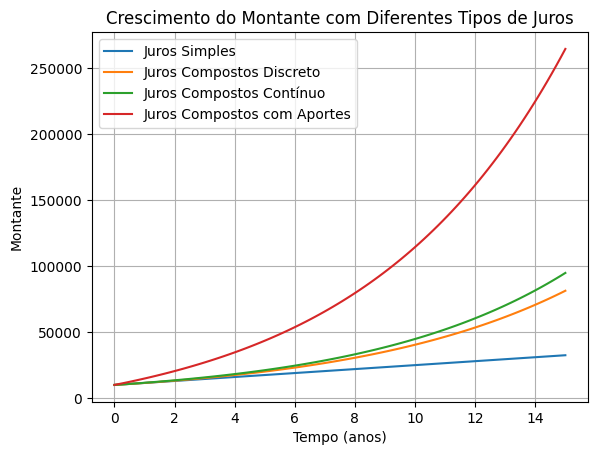

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def jsimp(inicial, taxa, tempo):
    """Calcula o montante a regime de juros simples"""
    taxa = taxa / 100
    montante = inicial + inicial * taxa * tempo
    return montante

def jcompCD(inicial, taxa, tempo, fc=1):
    """Calcula o montate a regime de juros compostos
    considerando um regime de capitalização discreta
    que por padrão é anual 'fc=1'"""
    taxa = taxa / (100 * fc)
    tempo = tempo * fc
    montante = inicial * ((1 + taxa) ** tempo)
    return montante

def jcompCC(inicial, taxa, tempo):
    """Calcula o montate a regime de juros compostos 
    considerando um regime de capitalização contínua"""
    taxa = taxa / 100
    montante = inicial * np.exp(taxa * tempo)
    return montante

def japort(inicial, taxa, tempo, aporte):
    """Calcula o montante a regime de juros compostos  
    considerando um regime de capitalização contínua
    e aportes mensais de valor fixo"""
    taxa = taxa / 100
    montante = (aporte / taxa) * (np.exp(taxa * tempo) - 1) + inicial * np.exp(taxa * tempo)
    return montante

# Gerar uma sequência de tempos 
t = np.linspace(0, 15, 100)  # tempo

# Ajustar taxa de juros e aportes
taxa_juros_anual = 15 # ajuste da taxa de juros anual
aporte_inicial = 10000 # ajuste do aporte inicial 
aporte_mensal = 3000 # ajuste do aporte mensal

# Calcular os montantes para cada tipo de juros
v = jsimp(aporte_inicial, taxa_juros_anual, t)  # juros simples
w = jcompCD(aporte_inicial, taxa_juros_anual, t, fc=1)  # juros compostos capitalização discreta
x = jcompCC(aporte_inicial, taxa_juros_anual, t)  # juros compostos capitalização contínua
y = japort(aporte_inicial, taxa_juros_anual, t, aporte_mensal)  # juros compostos capitalização contínua e aportes mensais

# Plotar os dados
plt.plot(t, v, label='Juros Simples')
plt.plot(t, w, label='Juros Compostos Discreto')
plt.plot(t, x, label='Juros Compostos Contínuo')
plt.plot(t, y, label='Juros Compostos com Aportes')

# Adicionar título e rótulos aos eixos
plt.title('Crescimento do Montante com Diferentes Tipos de Juros')
plt.xlabel('Tempo (anos)')
plt.ylabel('Montante')

# Adicionar uma grade
plt.grid(True)

# Adicionar uma legenda
plt.legend()

# Mostrar o gráfico
plt.show()

In [18]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np

# Reutilizando as funções de cálculo definidas anteriormente
def jsimp(inicial, taxa, tempo):
    """Calcula o montante a regime de juros simples"""
    taxa = taxa / 100
    montante = inicial + inicial * taxa * tempo
    return montante

def jcompCD(inicial, taxa, tempo, fc=1):
    """Calcula o montate a regime de juros compostos
    considerando um regime de capitalização discreta
    que por padrão é anual 'fc=1'"""
    taxa = taxa / (100 * fc)
    tempo = tempo * fc
    montante = inicial * ((1 + taxa) ** tempo)
    return montante

def jcompCC(inicial, taxa, tempo):
    """Calcula o montate a regime de juros compostos 
    considerando um regime de capitalização contínua"""
    taxa = taxa / 100
    montante = inicial * np.exp(taxa * tempo)
    return montante

def japort(inicial, taxa, tempo, aporte):
    """Calcula o montante a regime de juros compostos  
    considerando um regime de capitalização contínua
    e aportes mensais de valor fixo"""
    taxa = taxa / 100
    montante = (aporte / taxa) * (np.exp(taxa * tempo) - 1) + inicial * np.exp(taxa * tempo)
    return montante

# Função para gerar o gráfico
def plot_calculadora(inicial, taxa, tempo, aporte, fc):
    t = np.linspace(0, tempo, 100)  # tempo

    # Calcular os montantes para cada tipo de juros
    v = jsimp(inicial, taxa, t)  # juros simples
    w = jcompCD(inicial, taxa, t, fc=fc)  # juros compostos capitalização discreta
    x = jcompCC(inicial, taxa, t)  # juros compostos capitalização contínua
    y = japort(inicial, taxa, t, aporte)  # juros compostos capitalização contínua e aportes mensais

    # Plotar os dados
    plt.figure(figsize=(10, 6))
    plt.plot(t, v, label='Juros Simples')
    plt.plot(t, w, label='Juros Compostos Discreto')
    plt.plot(t, x, label='Juros Compostos Contínuo')
    plt.plot(t, y, label='Juros Compostos com Aportes')

    # Adicionar título e rótulos aos eixos
    plt.title('Crescimento do Montante com Diferentes Regimes de Juros')
    plt.xlabel('Tempo (anos)')
    plt.ylabel('Montante')

    # Adicionar uma grade
    plt.grid(True)

    # Adicionar uma legenda
    plt.legend()

    # Mostrar o gráfico
    plt.show()

# Criar widgets interativos
inicial_widget = widgets.FloatText(value=10000, description='Aporte Inicial:', style={'description_width': 'initial'})
taxa_widget = widgets.FloatText(value=15, description='Taxa de Juros (%):', style={'description_width': 'initial'})
tempo_widget = widgets.FloatSlider(value=15, min=1, max=50, step=1, description='Tempo (anos):', style={'description_width': 'initial'})
aporte_widget = widgets.FloatText(value=1000, description='Aporte Mensal:', style={'description_width': 'initial'})
fc_widget = widgets.FloatText(value=1, description='Frequência de Capitalização:', style={'description_width': 'initial'})

# Organizar os widgets em um layout horizontal
# widgets_box = widgets.VBox([
    widgets.HBox([inicial_widget, taxa_widget]),
    widgets.HBox([tempo_widget, aporte_widget, fc_widget])
])

# Criar interface interativa
interactive_plot = interactive(plot_calculadora, 
         inicial=inicial_widget, 
         taxa=taxa_widget, 
         tempo=tempo_widget, 
         aporte=aporte_widget, 
         fc=fc_widget)

# Mostrar widgets e interface interativa
#display(widgets_box)
display(interactive_plot)


interactive(children=(FloatText(value=10000.0, description='Aporte Inicial:', style=DescriptionStyle(descripti…